In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
min_sequences = 0

res = pd.read_csv( "../resources/phylosor_newnull_results.csv", parse_dates=["date"] )
res = res.loc[(res["countA"]>min_sequences)&(res["countB"]>min_sequences)]
res["kind"] = res["kind"].fillna( "null" )
res["kind"] = res["kind"] + res["num"].astype( str )
res = res.drop( columns=["num"] )

# Phylosor mean

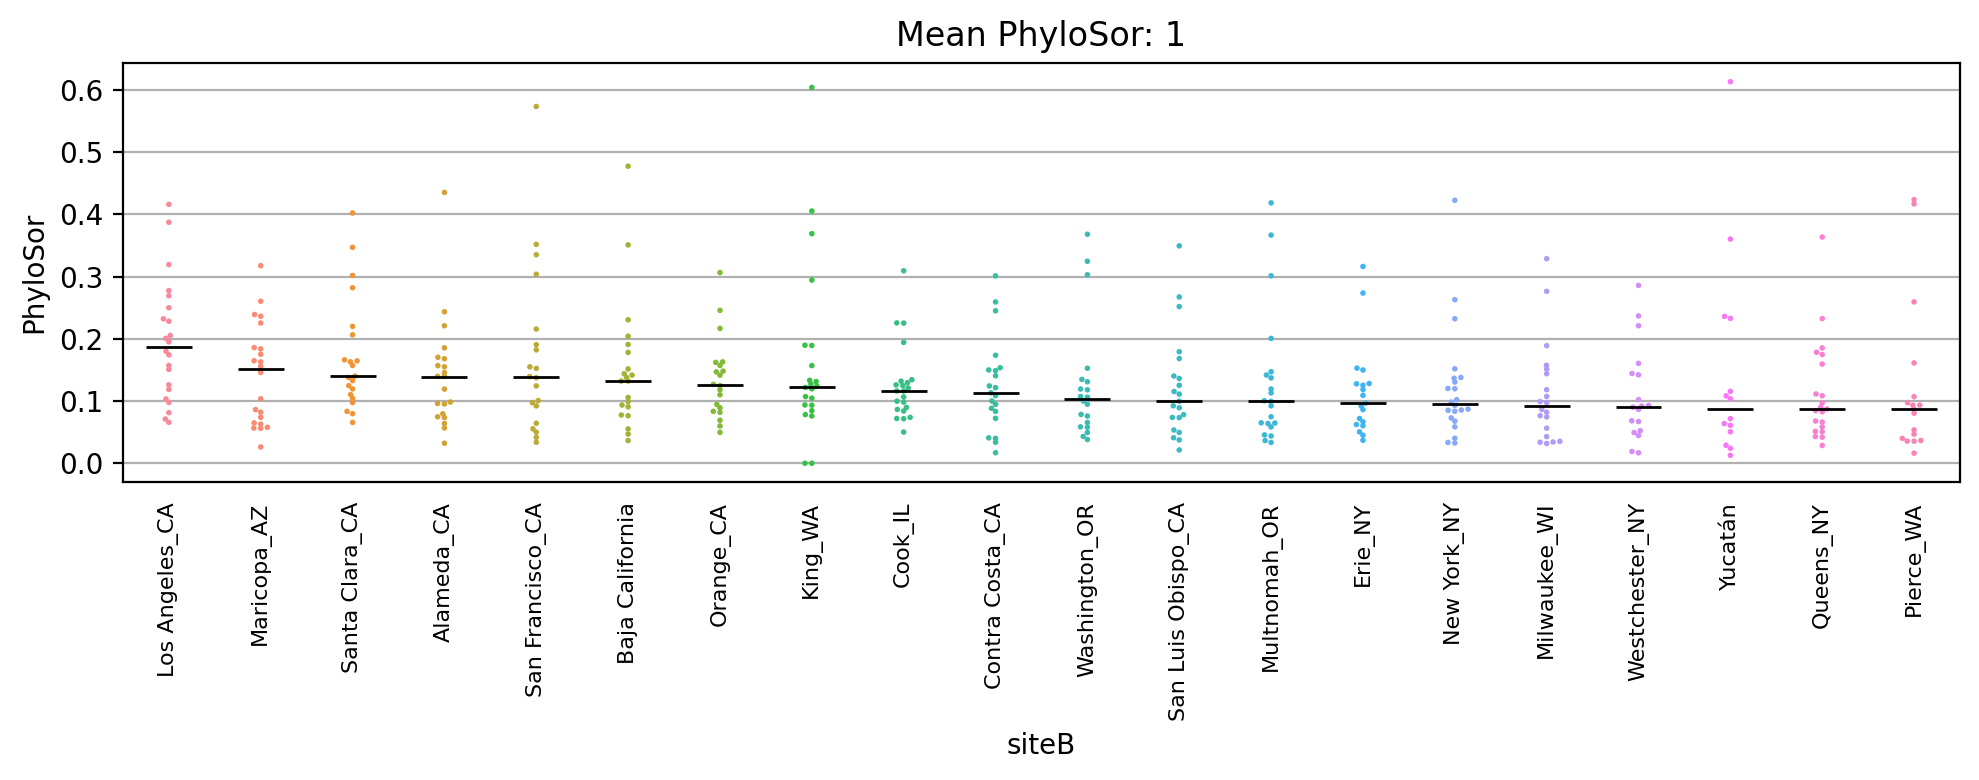

In [3]:
raw = res.loc[res["kind"]=="actual1"]
raw = raw.pivot( index="siteB", columns="date", values="value" )
raw = raw.reindex(index=raw.median(axis=1).sort_values( ascending=False ).index)

plot_df = raw.iloc[:20].melt( var_name="date", value_name="value", ignore_index=False ).reset_index()

plot_mean = raw.median( axis=1 )
plot_mean = plot_mean.reset_index().reset_index()

fig, ax = plt.subplots( dpi=200, figsize=(10,4) )
sns.swarmplot( x="siteB", y="value", data=plot_df, size=2, ax=ax, zorder=10 )
ax.hlines( plot_mean[0], xmin=plot_mean["index"]-0.25, xmax=plot_mean["index"]+0.25, color="black", linewidth=1, zorder=100 )

ax.tick_params( axis="x", bottom=False, which="both", rotation=90, labelbottom=True, labelsize=8 )
ax.set_ylabel( "PhyloSor" )
ax.set_title( f"Mean PhyloSor: {min_sequences+1}" )
ax.grid( axis="y", zorder=1 )

plt.tight_layout()
plt.show()

# Phylosor Norm

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


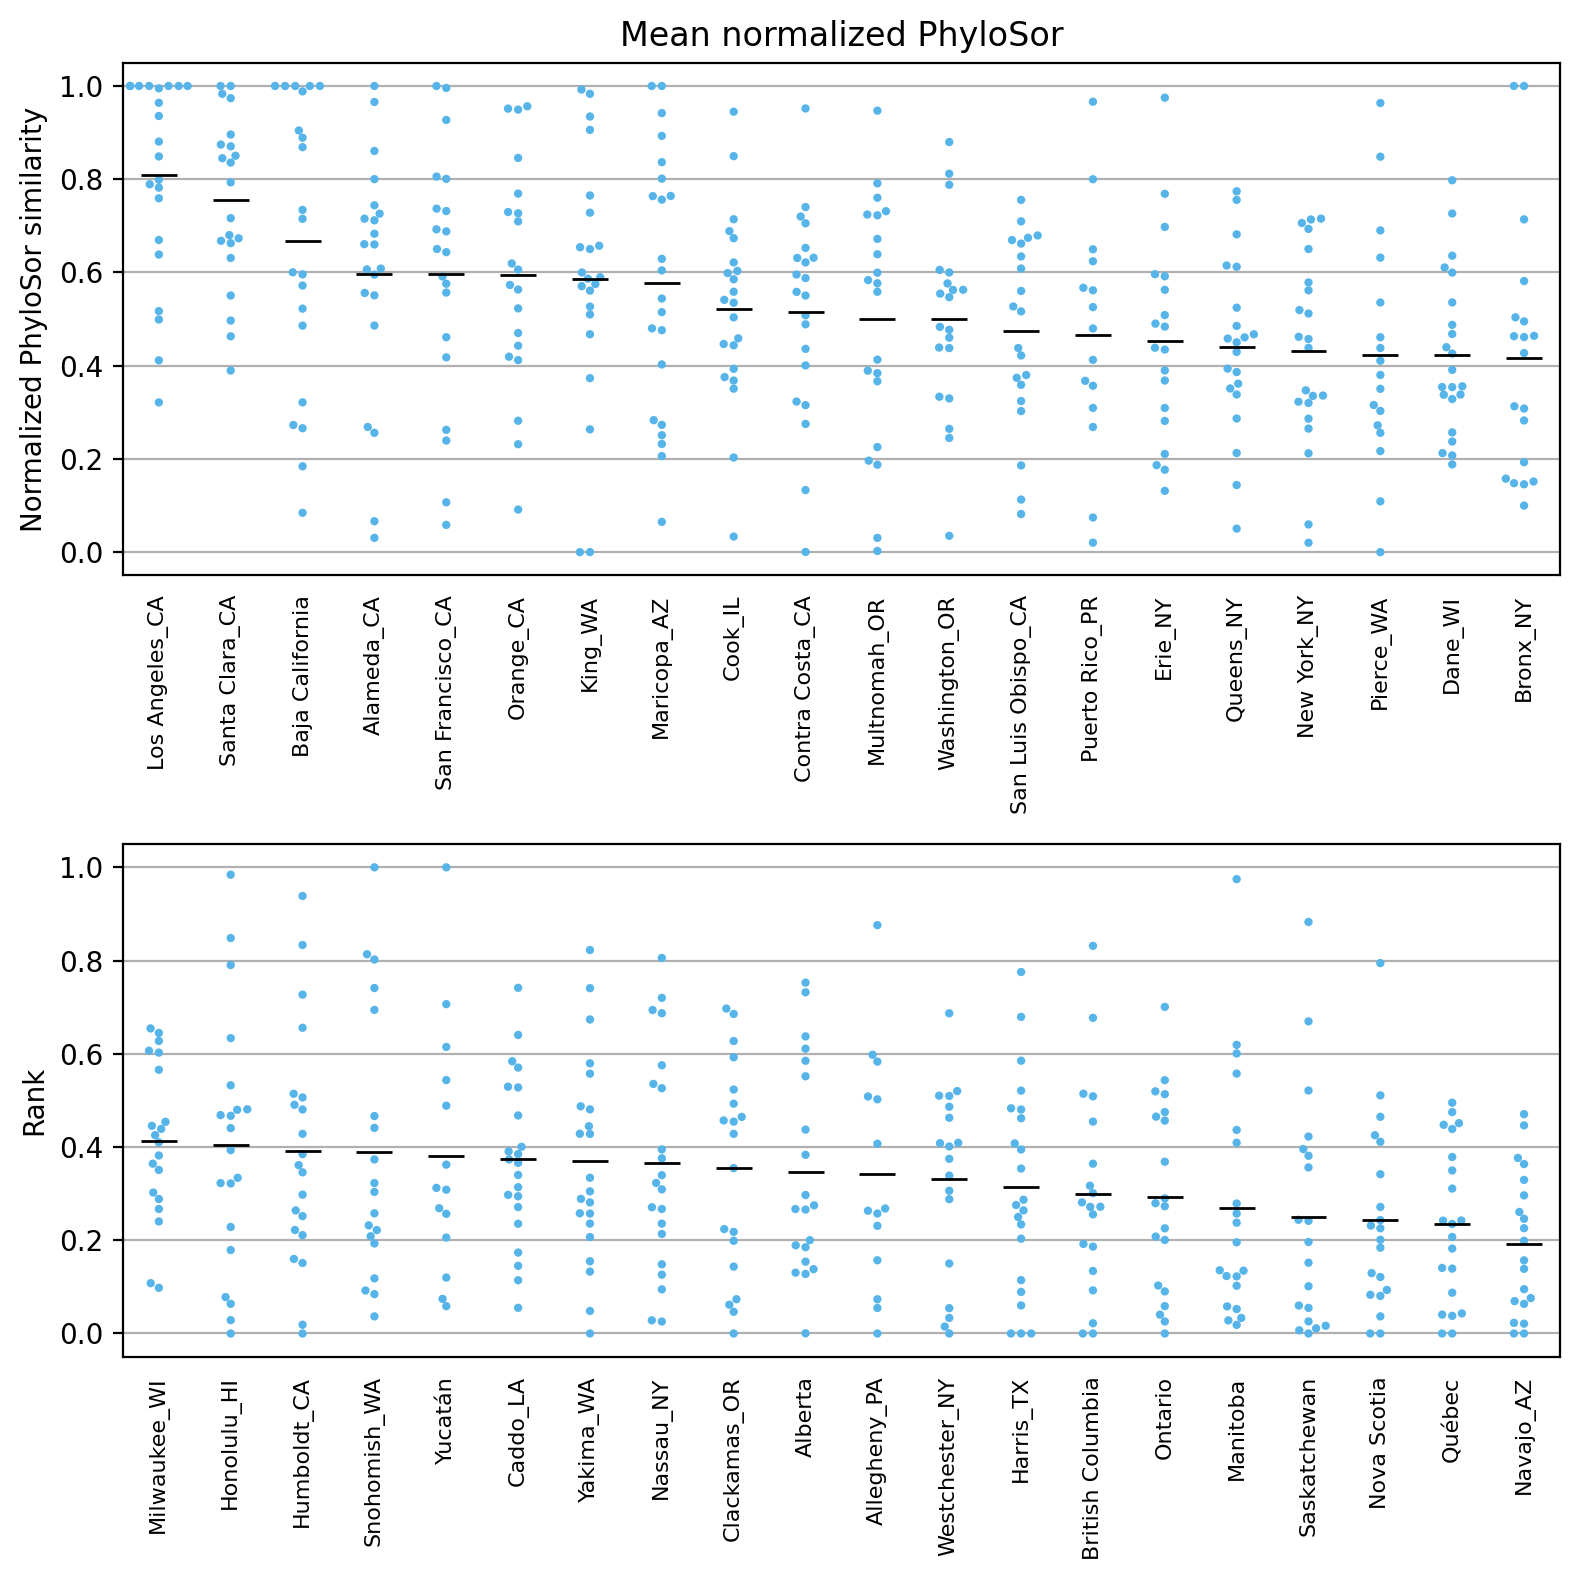

In [15]:
orders = (raw-raw.min())/(raw.max()-raw.min())
orders = orders.reindex( index=orders.mean( axis=1 ).sort_values( ascending=False ).index )

plot_df = orders.iloc[:20]
plot_mean = plot_df.mean( axis=1 ).reset_index().reset_index()
plot_df = plot_df.melt( var_name="date", value_name="value", ignore_index=False ).reset_index()

plot_df2 = orders.iloc[20:]
plot_mean2 = plot_df2.mean( axis=1 ).reset_index().reset_index()
plot_df2 = plot_df2.melt( var_name="date", value_name="value", ignore_index=False ).reset_index()

fig, ax = plt.subplots( dpi=200, figsize=(8,8), nrows=2, sharey=True )
sns.swarmplot( x="siteB", y="value", data=plot_df, size=3, ax=ax[0], color="#56B4E9" )
sns.swarmplot( x="siteB", y="value", data=plot_df2, size=3, ax=ax[1], color="#56B4E9" )
ax[0].hlines( plot_mean[0], xmin=plot_mean["index"]-0.25, xmax=plot_mean["index"]+0.25, color="black", linewidth=1, zorder=100 )
ax[1].hlines( plot_mean2[0], xmin=plot_mean2["index"]-0.25, xmax=plot_mean2["index"]+0.25, color="black", linewidth=1, zorder=100 )

ax[0].tick_params( axis="x", bottom=False, which="both", rotation=90, labelbottom=True, labelsize=8 )
ax[0].set_ylabel( "Normalized PhyloSor similarity" )
ax[0].set_xlabel( "" )
ax[0].set_title( f"Mean normalized PhyloSor" )
ax[0].grid( axis="y", zorder=1 )

ax[1].tick_params( axis="x", bottom=False, which="both", rotation=90, labelbottom=True, labelsize=8 )
ax[1].set_ylabel( "Rank" )
ax[1].set_xlabel( "" )
ax[1].grid( axis="y", zorder=1 )

plt.tight_layout()
plt.savefig( f"phylosor_norm.pdf" )
plt.show()

# Phylosor order

In [4]:
raw = res.loc[res["kind"]=="actual1"]
raw = raw.pivot( index="siteB", columns="date", values="value" )
orders = raw.rank( ascending=False )
orders = orders.reindex(index=orders.median(axis=1).sort_values().index)
orders.median( axis=1 )

siteB
Santa Clara_CA         3.0
Los Angeles_CA         3.0
Alameda_CA             6.0
Baja California        6.0
Orange_CA              7.5
San Francisco_CA       9.0
Multnomah_OR           9.0
King_WA                9.0
San Luis Obispo_CA    12.0
Maricopa_AZ           12.5
Contra Costa_CA       13.0
Cook_IL               13.5
New York_NY           14.5
Washington_OR         16.0
Milwaukee_WI          17.0
Erie_NY               17.0
Honolulu_HI           18.0
Puerto Rico_PR        18.0
Harris_TX             19.0
Dane_WI               19.0
Allegheny_PA          19.5
Queens_NY             20.0
Caddo_LA              20.5
Westchester_NY        21.0
Humboldt_CA           21.0
Bronx_NY              22.0
Yakima_WA             22.5
Clackamas_OR          23.0
Snohomish_WA          25.0
Pierce_WA             25.0
British Columbia      26.0
Nassau_NY             26.0
Alberta               26.0
Ontario               26.0
Yucatán               28.5
Manitoba              30.5
Québec                

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


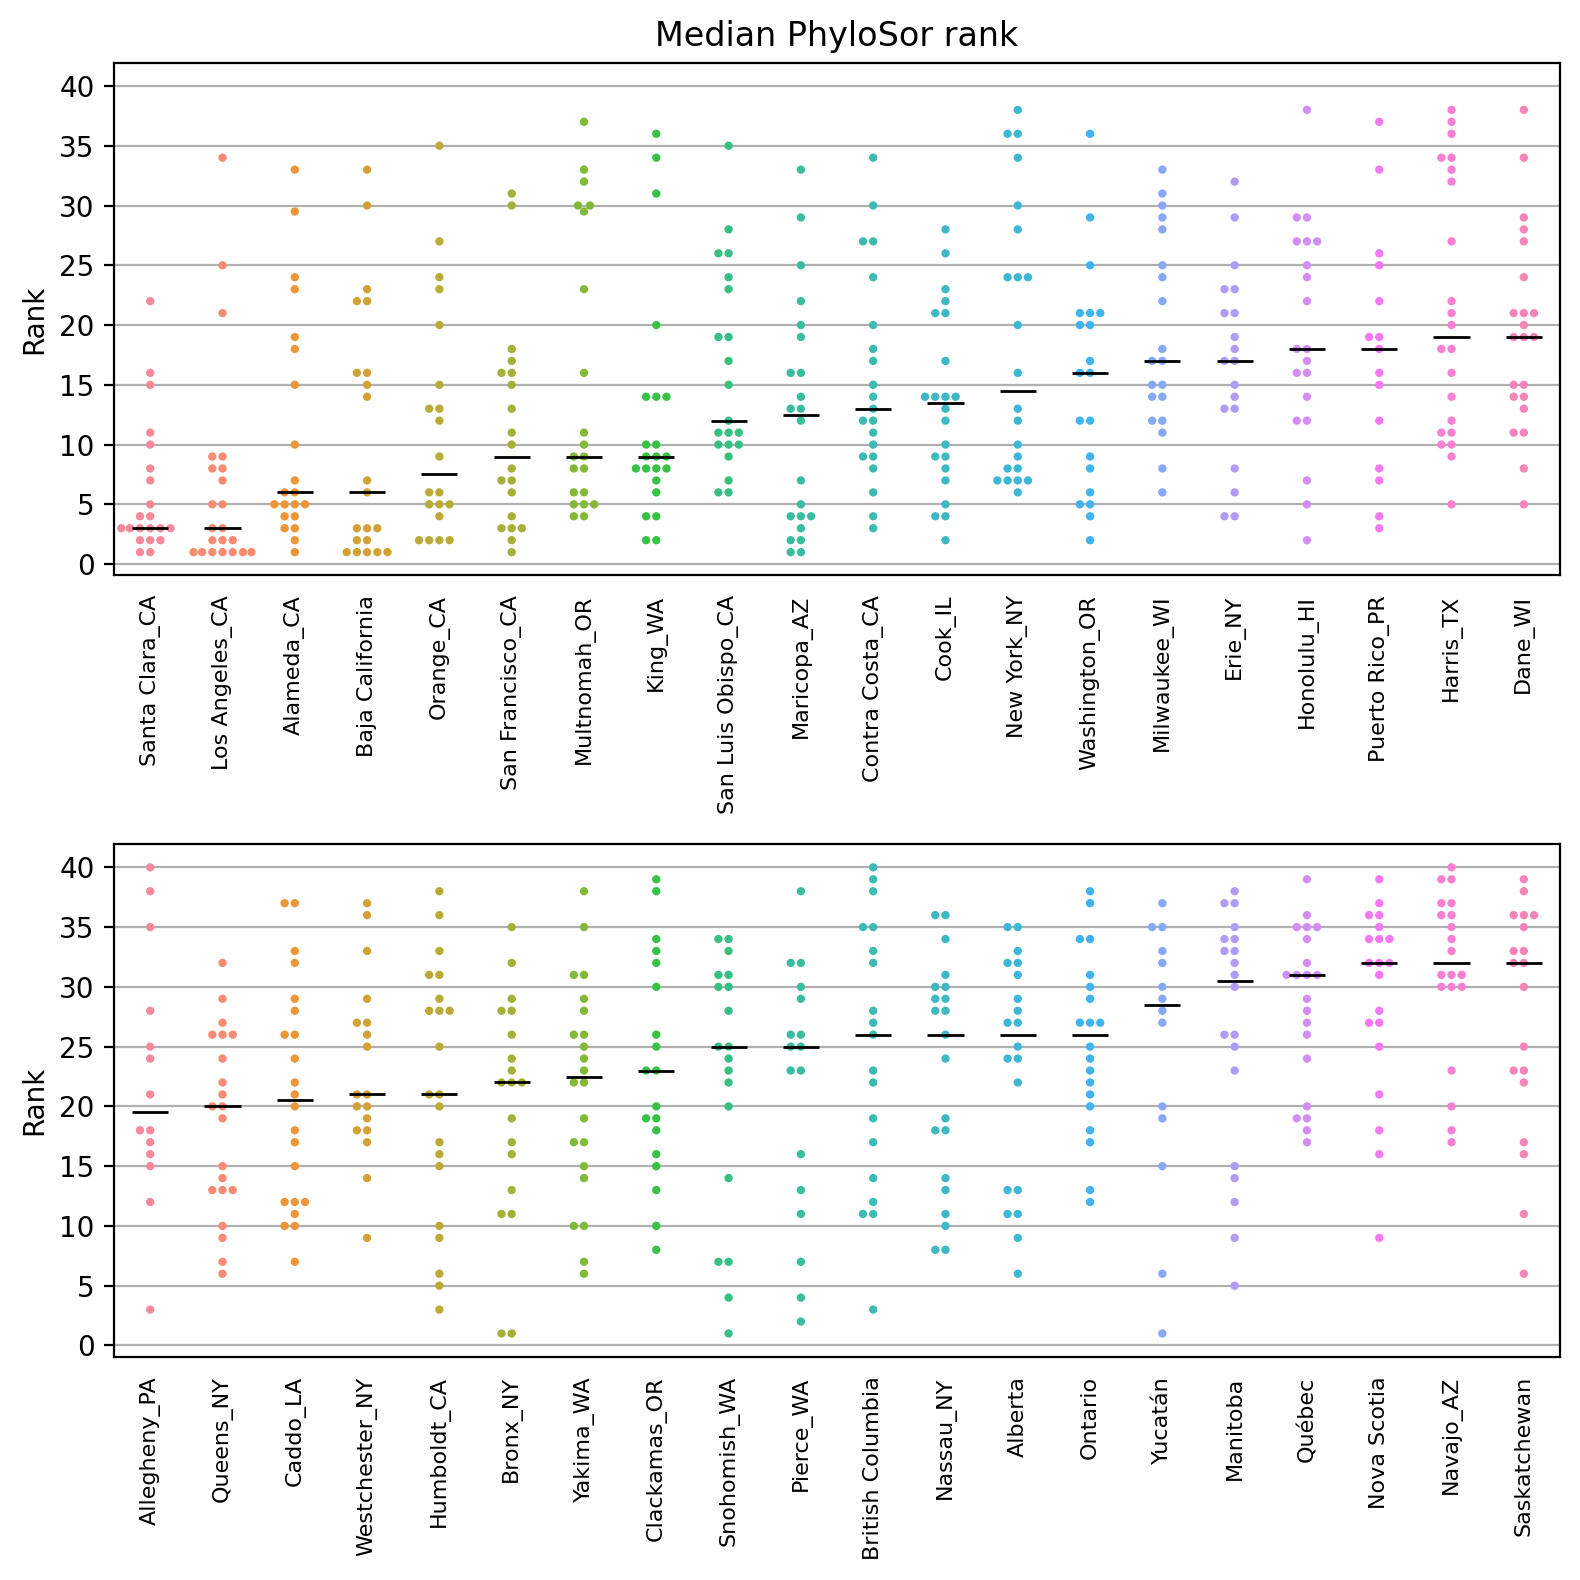

In [5]:
plot_df = orders.iloc[:20]
plot_mean = plot_df.median( axis=1 ).reset_index().reset_index()
plot_df = plot_df.melt( var_name="date", value_name="value", ignore_index=False ).reset_index()

plot_df2 = orders.iloc[20:]
plot_mean2 = plot_df2.median( axis=1 ).reset_index().reset_index()
plot_df2 = plot_df2.melt( var_name="date", value_name="value", ignore_index=False ).reset_index()

fig, ax = plt.subplots( dpi=200, figsize=(8,8), nrows=2, sharey=True )
sns.swarmplot( x="siteB", y="value", data=plot_df, size=3, ax=ax[0] )
sns.swarmplot( x="siteB", y="value", data=plot_df2, size=3, ax=ax[1] )
ax[0].hlines( plot_mean[0], xmin=plot_mean["index"]-0.25, xmax=plot_mean["index"]+0.25, color="black", linewidth=1, zorder=100 )
ax[1].hlines( plot_mean2[0], xmin=plot_mean2["index"]-0.25, xmax=plot_mean2["index"]+0.25, color="black", linewidth=1, zorder=100 )

ax[0].tick_params( axis="x", bottom=False, which="both", rotation=90, labelbottom=True, labelsize=8 )
ax[0].set_ylabel( "Rank" )
ax[0].set_xlabel( "" )
ax[0].set_title( f"Median PhyloSor rank" )
ax[0].grid( axis="y", zorder=1 )

ax[1].tick_params( axis="x", bottom=False, which="both", rotation=90, labelbottom=True, labelsize=8 )
ax[1].set_ylabel( "Rank" )
ax[1].set_xlabel( "" )
ax[1].grid( axis="y", zorder=1 )

plt.tight_layout()
plt.savefig( f"order_{min_sequences+1}.pdf" )
plt.show()

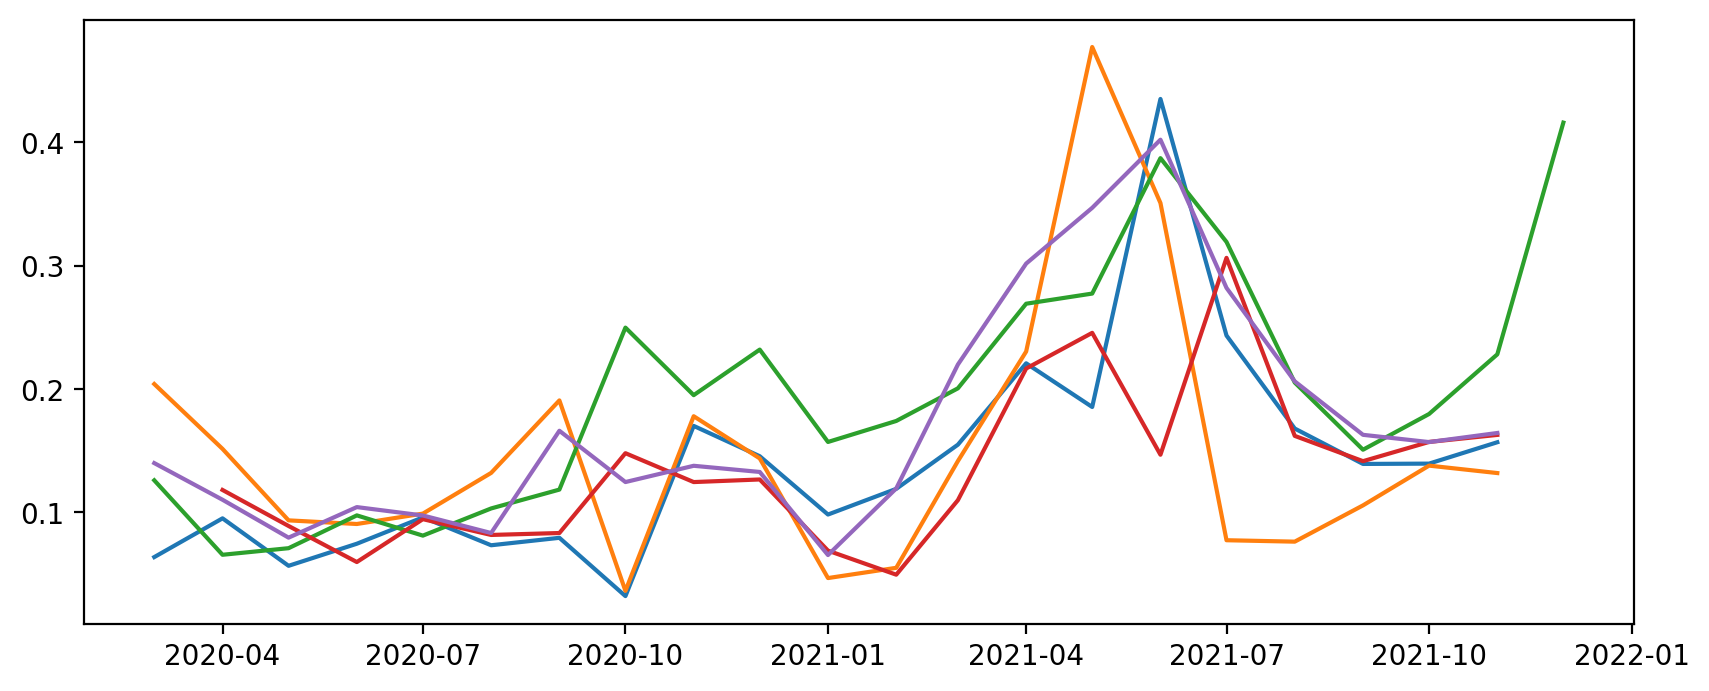

In [94]:
plot_df = res.loc[(res["kind"]=="actual1")&(res["siteB"].isin( orders.index[:5]))]

fig, ax = plt.subplots( dpi=200, figsize=(10,4) )
for name, entry in plot_df.groupby( "siteB" ):
    ax.plot( "date", "value", data=entry, label=name )

In [74]:
first_wave = ["2020-03-01", "2020-04-01", "2020-05-01", "2020-06-01", "2020-07-01", "2020-08-01"] # ("2020-01-01","2020-08-15")
second_wave = ( "2020-11-01", "2021-03-02" )
third_wave = ( "2021-07-01", "2022-03-02" )

In [87]:
plot_df = orders[first_wave]
plot_mean = plot_df.median( axis=1 ).sort_values().reset_index().reset_index()

,index,siteB,0
0,0,Baja California,1.5
1,1,Los Angeles_CA,6.0
2,2,Orange_CA,6.0
3,3,Erie_NY,6.0
4,4,Santa Clara_CA,7.0
5,5,San Francisco_CA,7.0
6,6,Alameda_CA,10.5
7,7,British Columbia,11.0
8,8,Cook_IL,11.5
9,9,Alberta,12.0


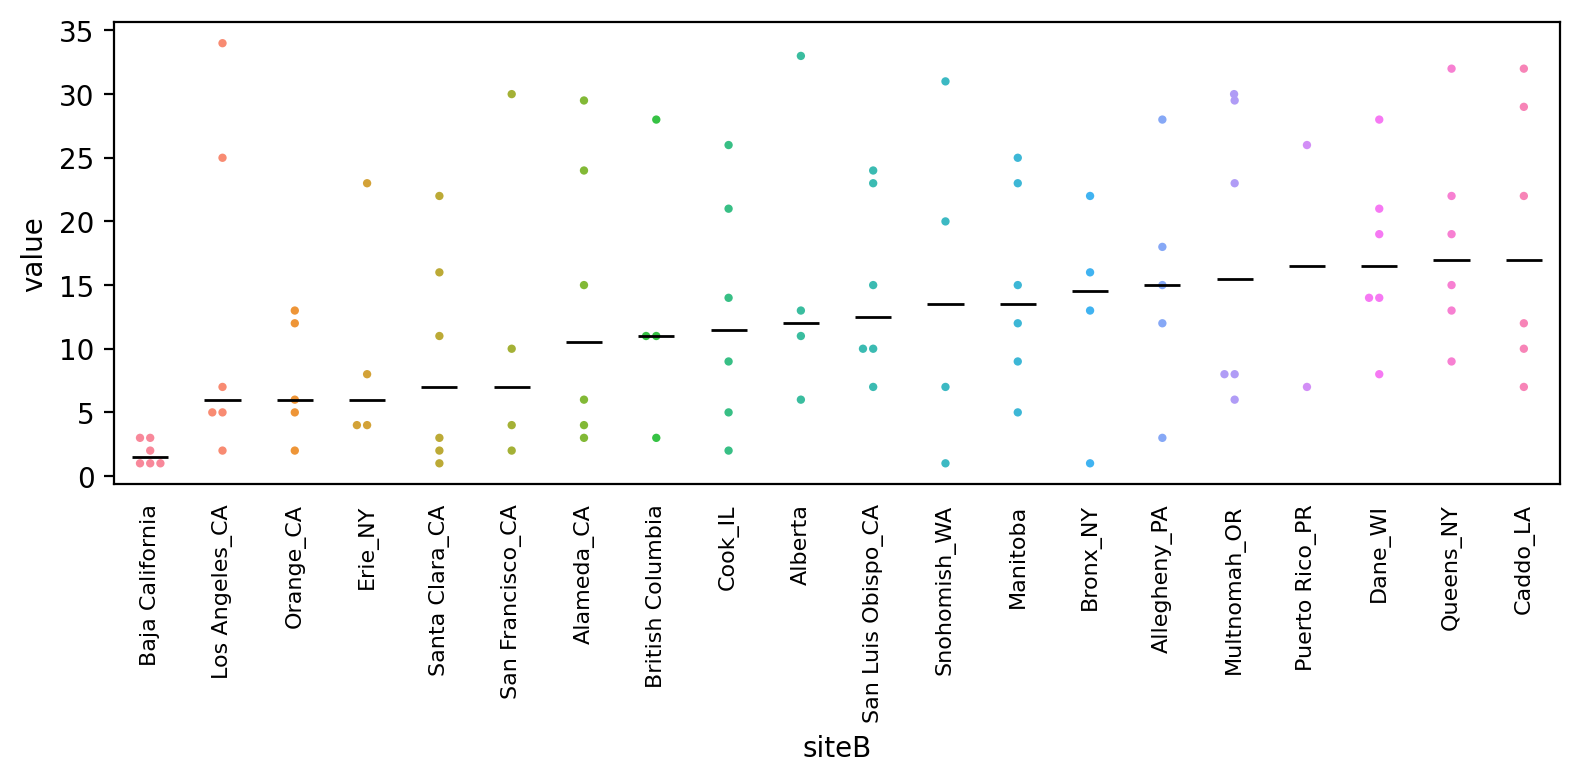

In [88]:
plot_df = orders[first_wave]
plot_mean = plot_df.median( axis=1 ).sort_values().reset_index().reset_index()
plot_df = plot_df.reindex( index=plot_mean["siteB"] )
plot_df = plot_df.iloc[:20].melt( var_name="date", value_name="value", ignore_index=False ).reset_index()

fig, ax = plt.subplots( dpi=200, figsize=(8,4) )
sns.swarmplot( x="siteB", y="value", data=plot_df, size=3, ax=ax )
ax.hlines( plot_mean[0], xmin=plot_mean["index"]-0.25, xmax=plot_mean["index"]+0.25, color="black", linewidth=1, zorder=100 )
ax.tick_params( axis="x", bottom=False, which="both", rotation=90, labelbottom=True, labelsize=8 )
plt.tight_layout()
plt.show()

# Mean difference to mixed model

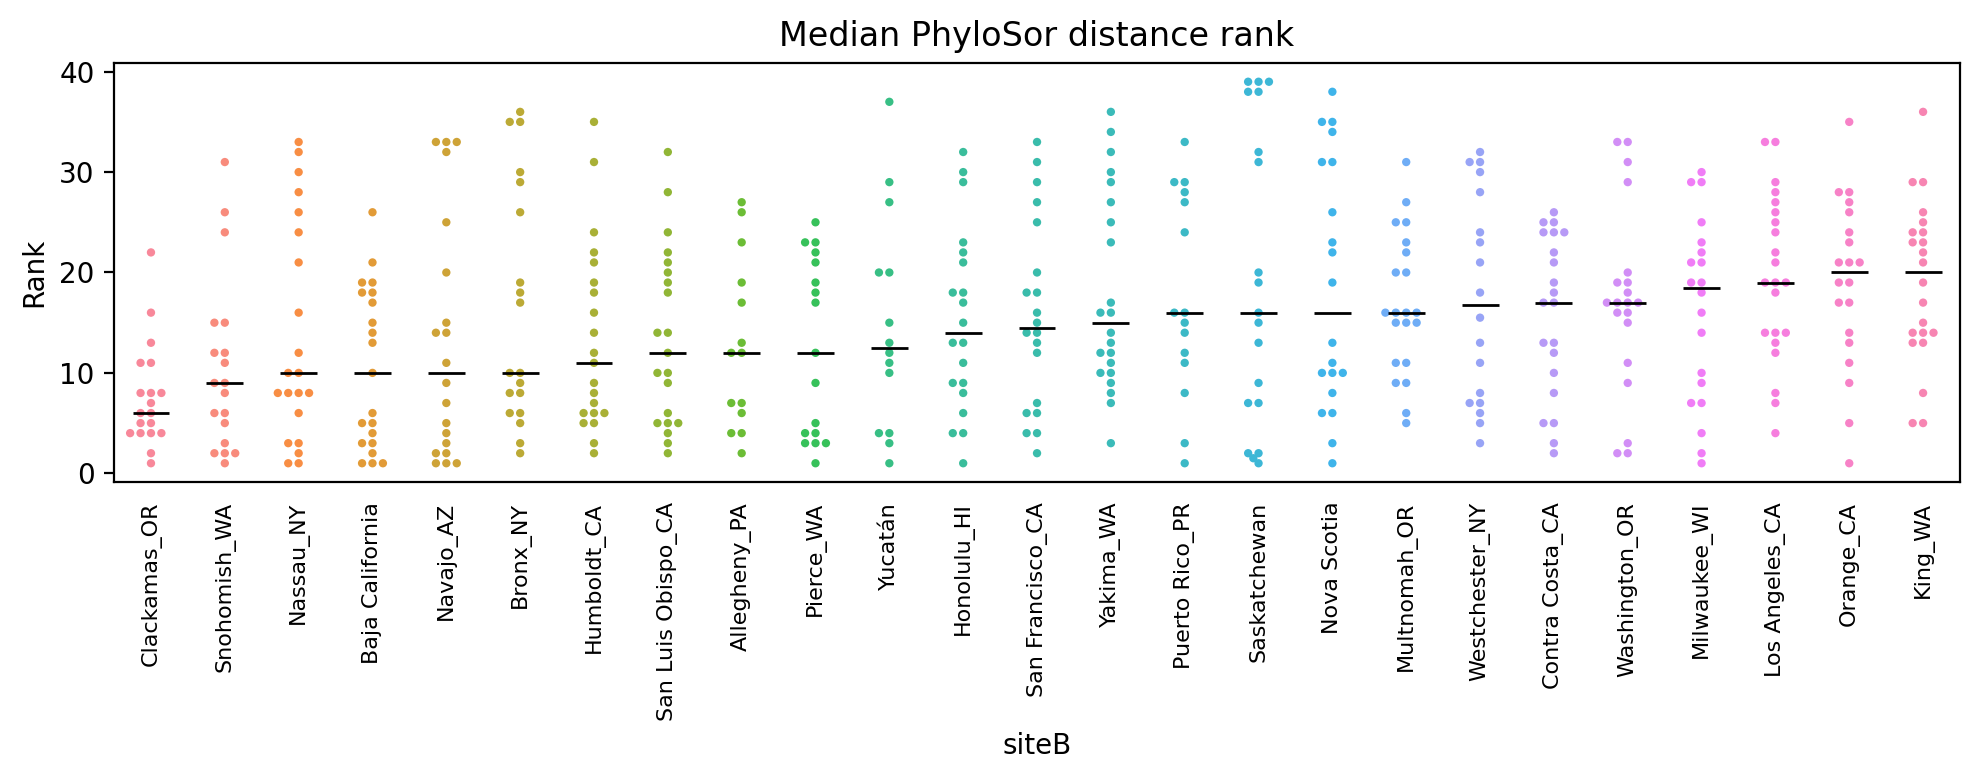

In [6]:
def correct_results( entry, column ):
    a = entry.loc[entry["kind"].str.startswith("actual")]
    n = entry.loc[entry["kind"].str.startswith("null")]
    n = n.groupby( ["siteA", "siteB", "date"] )[column].agg(
        null_upper=lambda x: x.quantile( 0.975 ),
        null_lower=lambda x: x.quantile( 0.025 ),
        null_median="median" )
    a = a.merge( n, left_on=["siteA", "siteB", "date"], right_index=True, validate="1:1" )
    a["corrected_sub"] = a["null_upper"] - a[column]
    #a["corrected_z"] = (a["value_turn"] - a["null_mean"]) / a["null_std"]
    return a

cor = correct_results( res, "value" )
cor = cor.pivot( index="siteB", columns="date", values="corrected_sub" )
orders = cor.rank()
orders = orders.reindex(index=orders.median(axis=1).sort_values().index)

plot_df = orders.iloc[:25].melt( var_name="date", value_name="value", ignore_index=False ).reset_index()

plot_mean = orders.median( axis=1 )
plot_mean = plot_mean.reset_index().reset_index()

fig, ax = plt.subplots( dpi=200, figsize=(10,4) )
sns.swarmplot( x="siteB", y="value", data=plot_df, size=3, ax=ax )
ax.hlines( plot_mean[0], xmin=plot_mean["index"]-0.25, xmax=plot_mean["index"]+0.25, color="black", linewidth=1, zorder=100 )

ax.tick_params( axis="x", bottom=False, which="both", rotation=90, labelbottom=True, labelsize=8 )
ax.set_ylabel( "Rank" )
ax.set_title( f"Median PhyloSor distance rank" )

plt.tight_layout()
#plt.savefig( f"phylosor_distance_order_{min_sequences+1}.pdf" )
plt.show()

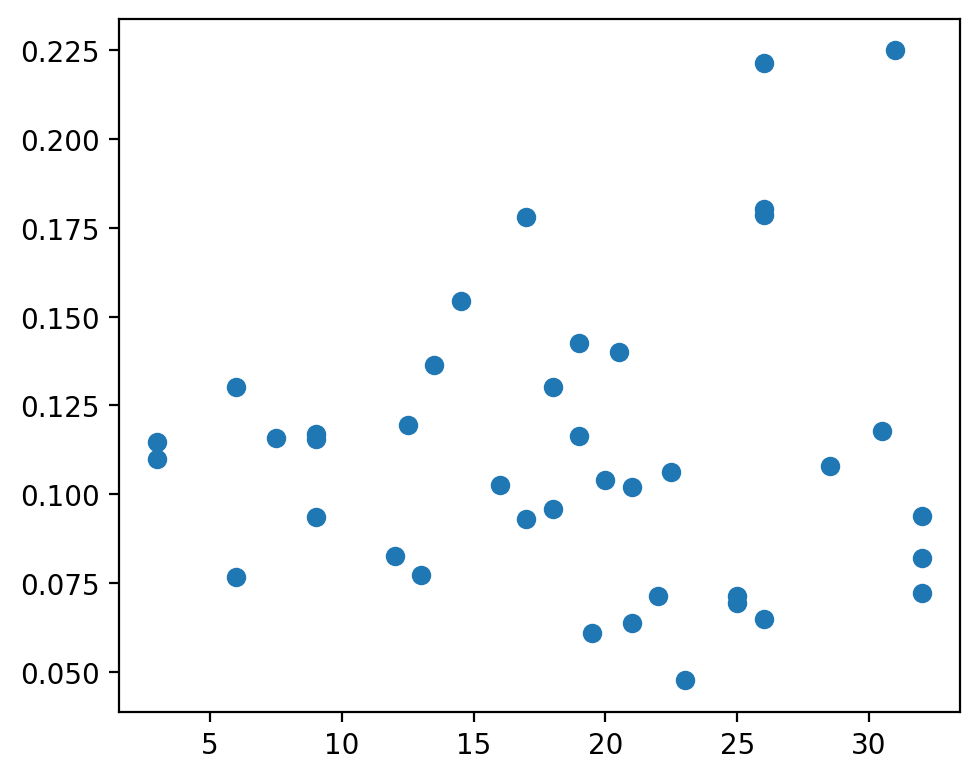

In [12]:
raw = res.loc[res["kind"]=="actual1"]
raw = raw.pivot( index="siteB", columns="date", values="value" )
orders = raw.rank( ascending=False )
orders = orders.reindex(index=orders.median(axis=1).sort_values().index)
phylosor_order = orders.median( axis=1 )

cor = correct_results( res, "value" )
cor = cor.pivot( index="siteB", columns="date", values="corrected_sub" )
null_order = cor.median( axis=1 )

plot_df = pd.concat( [phylosor_order, null_order], ignore_index=False, axis=1 )
plot_df.columns = ["phylosor_rank", "mixing"]

fig, ax = plt.subplots( dpi=200, figsize=(5,4) )
ax.scatter( "phylosor_rank", "mixing", data=plot_df )
plt.tight_layout()
plt.show()

In [15]:
plot_df.sort_values( "phylosor_rank" )

,phylosor_rank,mixing
siteB,,
Santa Clara_CA,3.0,0.109796
Los Angeles_CA,3.0,0.114748
Alameda_CA,6.0,0.130219
Baja California,6.0,0.076621
Orange_CA,7.5,0.115694
San Francisco_CA,9.0,0.093445
Multnomah_OR,9.0,0.116820
King_WA,9.0,0.115587
San Luis Obispo_CA,12.0,0.082604
